<a href="https://colab.research.google.com/github/lolobq/ECGR-5105-Intro_To_Machine_Learning/blob/main/Homework4/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Data

In [140]:
# Generic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.svm import SVC, SVR

In [141]:
# Import csv data from my GitHub repo
cancer_url = 'https://raw.githubusercontent.com/lolobq/ECGR-5105-Intro_To_Machine_Learning/master/Homework4/cancer.csv'
housing_url = 'https://raw.githubusercontent.com/lolobq/ECGR-5105-Intro_To_Machine_Learning/master/Homework4/Housing.csv'

# Create dataframes for each url
cancer_df = pd.read_csv(cancer_url)
housing_df = pd.read_csv(housing_url)

# Display the first 5 rows of the DataFrame
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Code for Problem 1

## Pre-Processing

In [142]:
# Extract the input and output values
x = cancer_df.drop(columns=['diagnosis', 'id'])
y = cancer_df['diagnosis'].map({'M': 1, 'B': 0})  # Convert M to 1 and B to 0

# Scale the data using standardization
x = StandardScaler().fit_transform(x)

## PCA and SVM Classification

In [143]:
def svm_train(x, y, kernel_in, N):
    """
    Build an SVM classifier using PCA feature extraction.

    Parameters:
    x : The input data
    y : The output data
    kernel_in : The SVC kernel to use
    N : Number of principal components

    Returns:
    accuracies : An array containing accuracy values
    precisions : An array containing precision values
    recalls : An array containing recall values
    """
    accuracies = []
    precisions = []
    recalls = []

    # Initialize variables to store the best K and lowest MSE
    best_K = None
    highest_accuracy = 0

    for K in N:
      # Perform PCA
      pca = PCA(n_components=K)
      principalDf = pd.DataFrame(data = pca.fit_transform(x))

      # Split the data into training and validation sets
      x_train, x_test, y_train, y_test = train_test_split(principalDf.values, y, train_size = 0.8, test_size = 0.2, random_state = 0)

      # Perform classification
      classifier = SVC(kernel=kernel_in, C=3)
      classifier.fit(x_train, y_train)

      # Make predictions and find confusion matrix
      y_pred = classifier.predict(x_test)
      accuracy = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred)
      recall = recall_score(y_test, y_pred)

      accuracies.append(accuracy)
      precisions.append(precision)
      recalls.append(recall)

      # Check if this K has the highest accuracy
      if accuracy > highest_accuracy:
          highest_accuracy = accuracy
          best_K = K

    return accuracies, precisions, recalls, highest_accuracy, best_K

## Linear Kernel Plotting

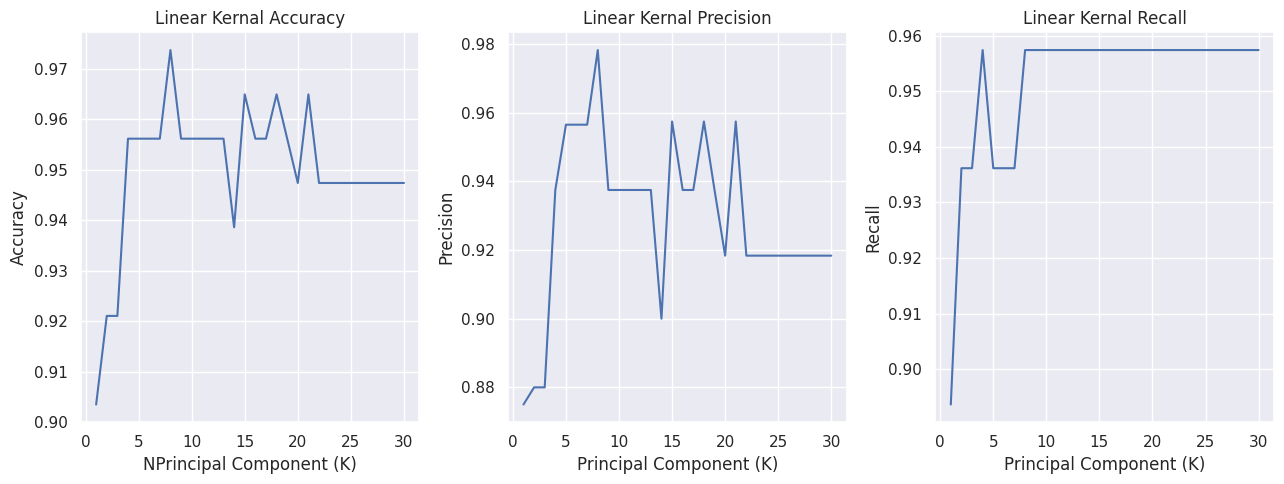

Optimum Number of K Principal Components: 8
Linear Highest Accuracy Value: 0.9736842105263158


In [144]:
N = [i for i in range(1, 31)]

accuracy, precision, recall, highest_acc, k_val = svm_train(x, y, 'linear', N)

plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
plt.plot(N, accuracy)
plt.title('Linear Kernal Accuracy')
plt.xlabel('NPrincipal Component (K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(N, precision)
plt.title('Linear Kernal Precision')
plt.xlabel('Principal Component (K)')
plt.ylabel('Precision')

plt.subplot(1, 3, 3)
plt.plot(N, recall)
plt.title('Linear Kernal Recall')
plt.xlabel('Principal Component (K)')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

print(f'Optimum Number of K Principal Components: {k_val}')
print(f'Linear Highest Accuracy Value: {highest_acc}')

## RBF Kernel Plotting

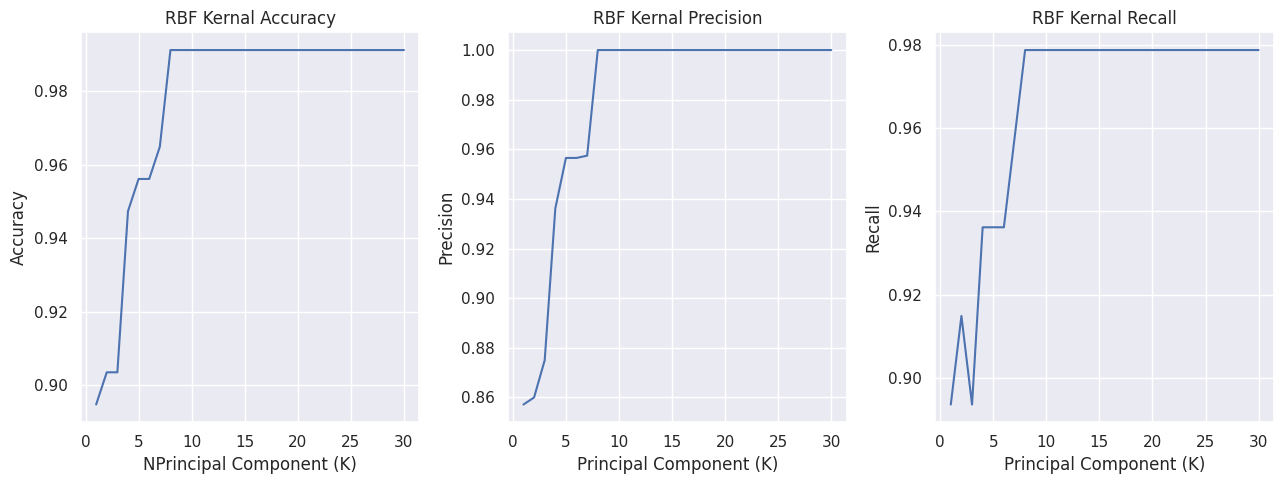

Optimum Number of K Principal Components: 8
Linear Highest Accuracy Value: 0.9912280701754386


In [145]:
N = [i for i in range(1, 31)]

accuracy, precision, recall, highest_acc, k_val = svm_train(x, y, 'rbf', N)

plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
plt.plot(N, accuracy)
plt.title('RBF Kernal Accuracy')
plt.xlabel('NPrincipal Component (K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(N, precision)
plt.title('RBF Kernal Precision')
plt.xlabel('Principal Component (K)')
plt.ylabel('Precision')

plt.subplot(1, 3, 3)
plt.plot(N, recall)
plt.title('RBF Kernal Recall')
plt.xlabel('Principal Component (K)')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

print(f'Optimum Number of K Principal Components: {k_val}')
print(f'Linear Highest Accuracy Value: {highest_acc}')

## Poly Kernel Plotting

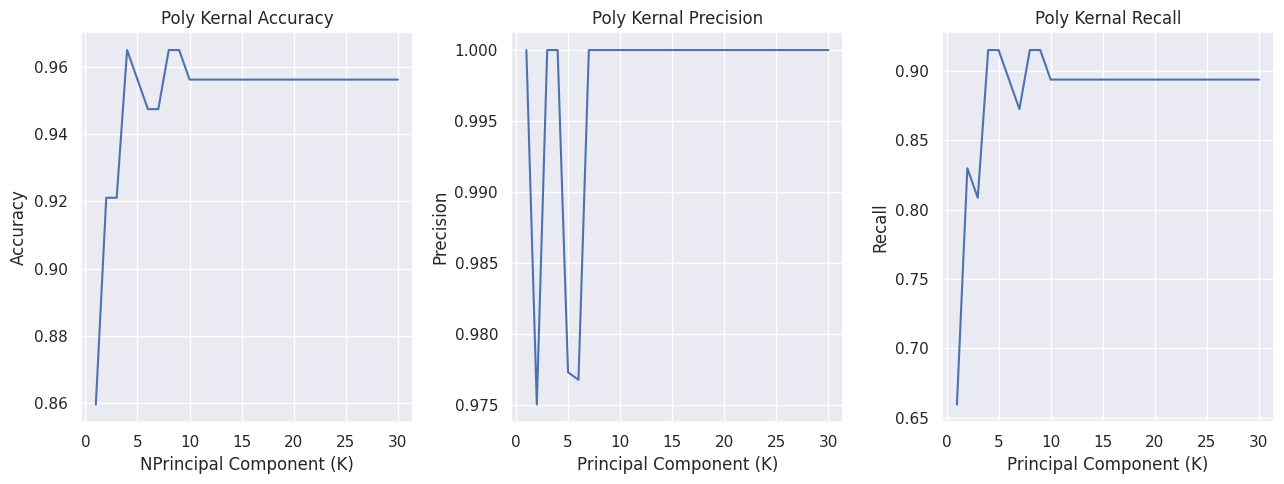

Optimum Number of K Principal Components: 4
Linear Highest Accuracy Value: 0.9649122807017544


In [146]:
N = [i for i in range(1, 31)]

accuracy, precision, recall, highest_acc, k_val = svm_train(x, y, 'poly', N)

plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
plt.plot(N, accuracy)
plt.title('Poly Kernal Accuracy')
plt.xlabel('NPrincipal Component (K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(N, precision)
plt.title('Poly Kernal Precision')
plt.xlabel('Principal Component (K)')
plt.ylabel('Precision')

plt.subplot(1, 3, 3)
plt.plot(N, recall)
plt.title('Poly Kernal Recall')
plt.xlabel('Principal Component (K)')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

print(f'Optimum Number of K Principal Components: {k_val}')
print(f'Linear Highest Accuracy Value: {highest_acc}')

## Comparing Accuracies

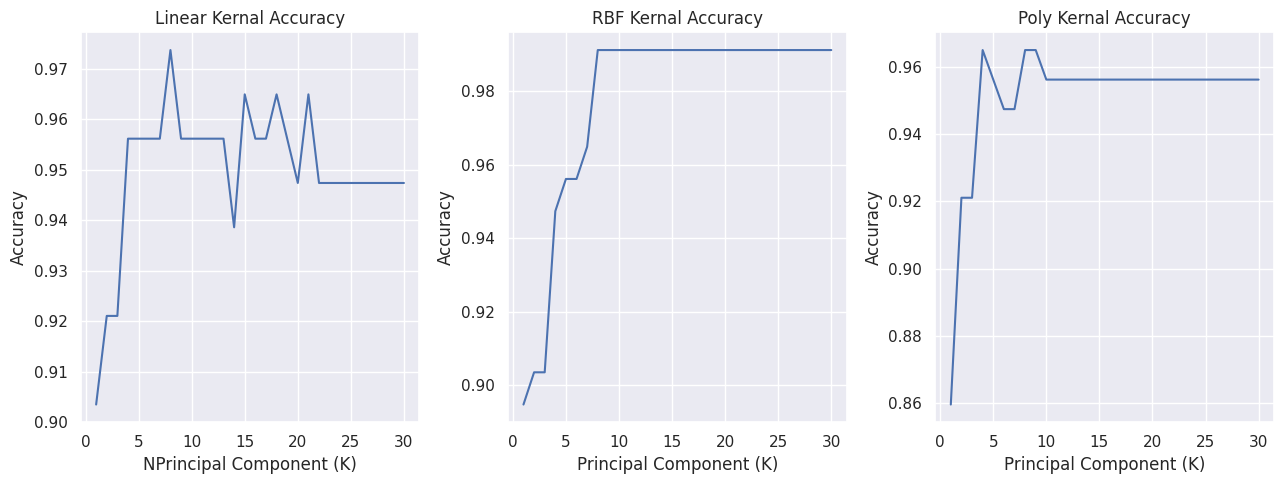

In [147]:
N = [i for i in range(1, 31)]

lin_accuracy, lin_precision, lin_recall, highest_acc, k_val = svm_train(x, y, 'linear', N)
rbf_accuracy, rbf_precision, rbf_recall, highest_acc, k_val = svm_train(x, y, 'rbf', N)
poly_accuracy, poly_precision, poly_recall, highest_acc, k_val = svm_train(x, y, 'poly', N)

plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
plt.plot(N, lin_accuracy)
plt.title('Linear Kernal Accuracy')
plt.xlabel('NPrincipal Component (K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(N, rbf_accuracy)
plt.title('RBF Kernal Accuracy')
plt.xlabel('Principal Component (K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 3)
plt.plot(N, poly_accuracy)
plt.title('Poly Kernal Accuracy')
plt.xlabel('Principal Component (K)')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

# Code for Problem 2

## Pre-Processing

In [148]:
# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing_df[varlist] = housing_df[varlist].apply(binary_map)
housing_df = housing_df.drop('furnishingstatus', axis=1)

# Separate x and y
x = housing_df.drop('price', axis=1)
y = housing_df['price'].values.reshape(-1, 1)

# Standardize data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size = 0.8, test_size = 0.2, random_state = 0)

## Plot Models for SVR

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


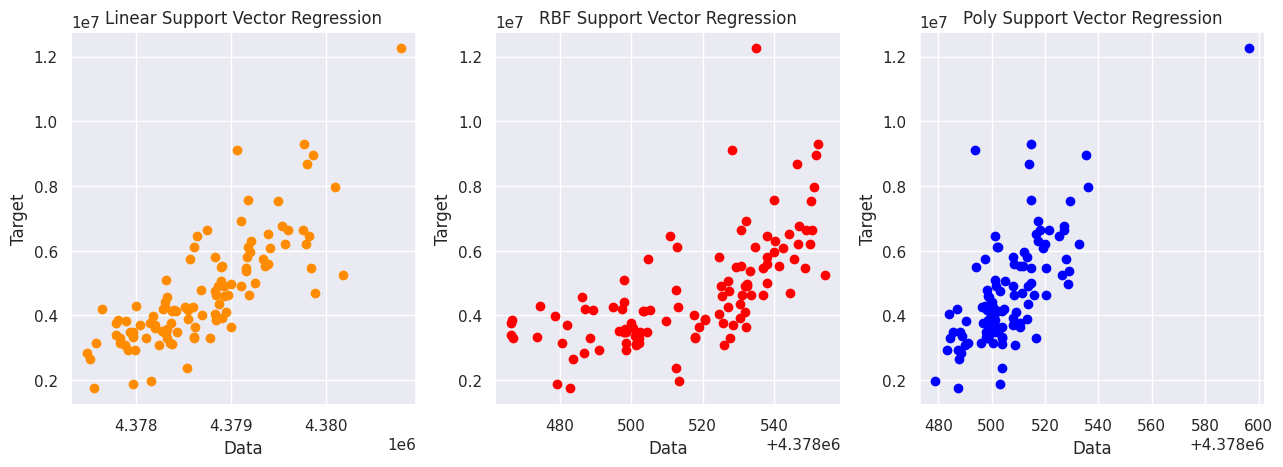

In [149]:
# Fit SVR models on the training data
svr_rbf = SVR(kernel='rbf', C=1, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1)
svr_poly = SVR(kernel='poly', C=1, degree=2)

y_rbf = svr_rbf.fit(x_train, y_train).predict(x_test)
y_lin = svr_lin.fit(x_train, y_train).predict(x_test)
y_poly = svr_poly.fit(x_train, y_train).predict(x_test)

# Look at the results
plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_lin, y_test, color='darkorange', label='test data')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Linear Support Vector Regression')

plt.subplot(1, 3, 2)
plt.scatter(y_rbf, y_test, color='red', label='test data')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('RBF Support Vector Regression')

plt.subplot(1, 3, 3)
plt.scatter(y_poly, y_test, color='blue', label='test data')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Poly Support Vector Regression')

plt.tight_layout()
plt.show()

## PCA and SVR Classification

In [150]:
def svr_train(x, y, kernel_in, N):
    """
    Build an SVR classifier using PCA feature extraction.

    Parameters:
    x : The input data
    y : The output data
    kernel_in : The SVR kernel to use
    N : Number of principal components

    Returns:
    accuracies : An array containing accuracy values
    precisions : An array containing precision values
    recalls : An array containing recall values
    """
    accuracies = []

    # Initialize variables to store the best K and lowest MSE
    best_K = None
    lowest_mse = float('inf')

    for K in N:
      # Perform PCA
      pca = PCA(n_components=K)
      principalDf = pd.DataFrame(data = pca.fit_transform(x))

      # Split the data into training and validation sets
      x_train, x_test, y_train, y_test = train_test_split(principalDf.values, y, train_size = 0.8, test_size = 0.2, random_state = 0)

      # Perform classification
      classifier = SVR(kernel=kernel_in, C=1)
      classifier.fit(x_train, y_train)

      # Make predictions and find confusion matrix
      y_pred = classifier.predict(x_test)

      # Calculate MSE
      mse = mean_squared_error(y_test, y_pred)
      accuracies.append(mse)

      # Check if this K has the lowest MSE
      if mse < lowest_mse:
          lowest_mse = mse
          best_K = K

    return accuracies, lowest_mse, best_K

## Comparing Accuracies

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

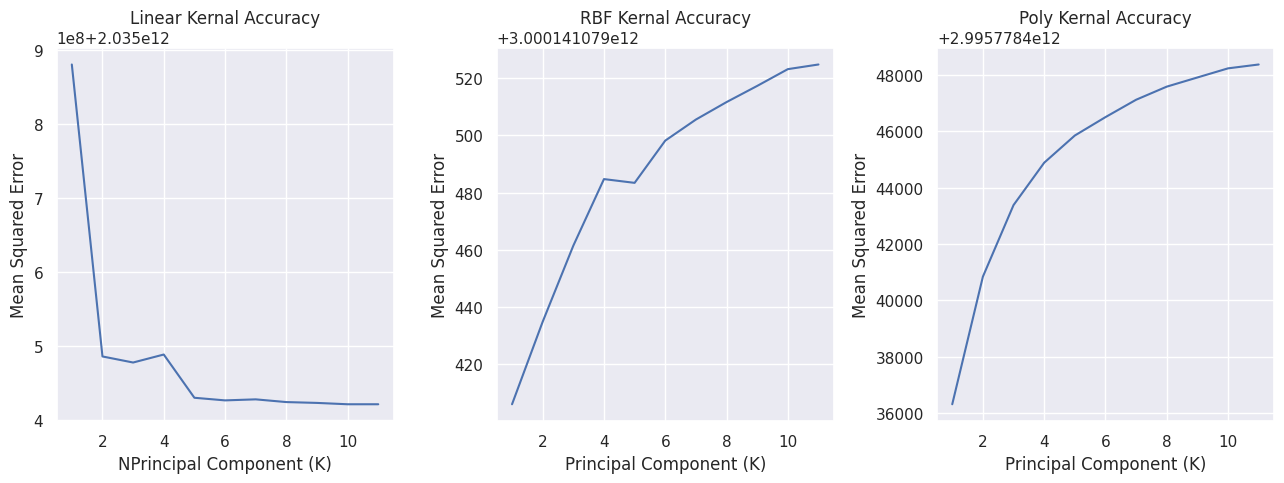

Linear Number of K Principal Components: 10
Linear Mean Squared Error Value: 2035421831509.1892
RBF Number of K Principal Components: 1
RBF Mean Squared Error Value: 3000141079406.065
Poly Number of K Principal Components: 1
Poly Mean Squared Error Value: 2995778436314.8477


In [151]:
N = [i for i in range(1, 12)]

lin_accuracy, lin_mse, lin_K = svr_train(x, y, 'linear', N)
rbf_accuracy, rbf_mse, rbf_K = svr_train(x, y, 'rbf', N)
poly_accuracy, poly_mse, poly_K = svr_train(x, y, 'poly', N)

plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
plt.plot(N, lin_accuracy)
plt.title('Linear Kernal Accuracy')
plt.xlabel('NPrincipal Component (K)')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 3, 2)
plt.plot(N, rbf_accuracy)
plt.title('RBF Kernal Accuracy')
plt.xlabel('Principal Component (K)')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 3, 3)
plt.plot(N, poly_accuracy)
plt.title('Poly Kernal Accuracy')
plt.xlabel('Principal Component (K)')
plt.ylabel('Mean Squared Error')

plt.tight_layout()
plt.show()

print(f'Linear Number of K Principal Components: {lin_K}')
print(f'Linear Mean Squared Error Value: {lin_mse}')
print(f'RBF Number of K Principal Components: {rbf_K}')
print(f'RBF Mean Squared Error Value: {rbf_mse}')
print(f'Poly Number of K Principal Components: {poly_K}')
print(f'Poly Mean Squared Error Value: {poly_mse}')